## Linear Regression

epoch= 1, weight=2.0897202492,loss=6951.293945312500000
epoch= 21, weight=24.5437927246,loss=4267.750488281250000
epoch= 41, weight=40.8301429749,loss=2872.071533203125000
epoch= 61, weight=52.6533851624,loss=2142.551513671875000
epoch= 81, weight=61.2435951233,loss=1759.576660156250000
epoch= 101, weight=67.4895324707,loss=1557.779052734375000
epoch= 121, weight=72.0340652466,loss=1451.111206054687500
epoch= 141, weight=75.3427734375,loss=1394.576538085937500
epoch= 161, weight=77.7531204224,loss=1364.545654296875000
epoch= 181, weight=79.5099716187,loss=1348.562988281250000


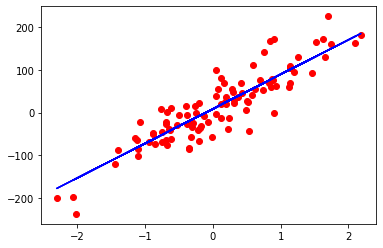

In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn import datasets

# scikit library is used to create a random dataset to demonstrate linear regression
# make_regression() function generates samples for inputs (features) and output (target) by applying random 
# linear regression mode
x_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=40, random_state=1)

# Convert numpy arrays to torch tensors as well as mention datatype
X = torch.from_numpy(x_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0],1)

n_samples, n_features = X.shape
in_size = n_features
out_size = 1

# Linear regression model
model = nn.Linear(in_size,1)

# Loss and optimizer
criterion = nn.MSELoss()
learning_rate=1e-2
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

# Train the model
for epoch in range(200):
    
    # forward pass
    pred = model(X)
    ls = criterion(pred, y)
    
    # Backward and optimize
    optimizer.zero_grad()
    ls.backward()
    optimizer.step()
    
    # printing few steps
    if epoch%20==0:
        [w,a] = model.parameters()
        print(f'epoch= {epoch+1}, weight={w[0][0]:.10f},loss={ls:.15f}')

# detach() returns a new Tensor, detached from the current graph thus no gradient will be backpropagated along with the variable
# numpy() converts the tensor to numpy array
predicted = model(X).detach().numpy()

# Plot the graph
plt.plot(x_numpy, y_numpy,'ro')
plt.plot(x_numpy, predicted,'b')
plt.show()